# Data Processing of Accelerometer Data
This notebook arranged for extracting and processing accelerometer data, especially from Piezotronic (National Instruments) and Digiducer devices. This notebook is arranged as the following work order
1. Extract acceleration data from the obtained measurement file
2. Interpret acceleration data in both time and frequency domain 
3. Convert the acceleration data into velocity and diplacement units
4. Evalute all vibrations data based on defined standard 

### Pre processing step
All necessary library are imported 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tkinter import filedialog as fd
from utils import *

### Working on Digiducer Data
This section focused on extracting and processing data form Digiducer sensor

#### 1. Extract and pre-process data from digiducer data

In [5]:
# extract digiducer data
time, accA, accB = extract_digiducer()
print("The data was successfully loaded")

Data extracted from selected file
The data was successfully loaded


#### 2a. Segmenting the acceleration data on each frequencies stimulus (on time domain) and visualizing it

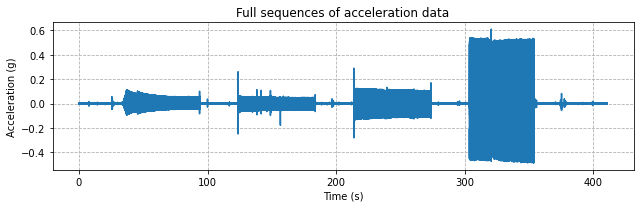

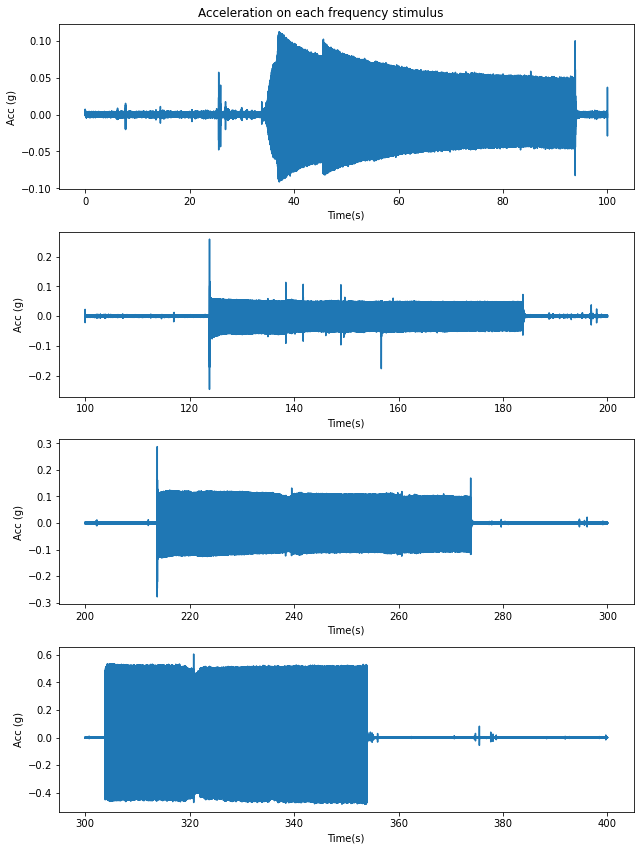

In [18]:
# time based plot of full sequences of loaded data
fig1 = plt.figure(figsize=(9,3), tight_layout=True)
ax1 = fig1.add_subplot(111)
ax1.set_facecolor('white')
ax1.grid(True,which='both',ls='--')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Acceleration (g)")
ax1.set_title("Full sequences of acceleration data")
line1, = ax1.plot(time, accB)

# segmenting the data for each sequence of stimulus (pure tones having frequencies of 31.5; 40; 50; and 63 Hz)
digiducer_fs = 8000
datapoints = [
    [0*digiducer_fs, 100*digiducer_fs],
    [100*digiducer_fs, 200*digiducer_fs],
    [200*digiducer_fs, 300*digiducer_fs],
    [300*digiducer_fs, 400*digiducer_fs],
    ]

segmented_data = segmenting_data(accA, datapoints)

# interpret acceleration in time domain data for each frequencies
fig2 = plt.figure(figsize=(9,12), tight_layout=True)
fig2.suptitle("Acceleration on each frequency stimulus")
for i in range(len(datapoints)):
    fig2.add_subplot(len(datapoints),1,i+1)
    plt.plot(time[datapoints[i][0]:datapoints[i][1]], segmented_data[i])
    plt.xlabel("Time(s)")
    plt.ylabel("Acc (g)")

plt.show()
